In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.ensemble import RandomForestRegressor
import sys
from sklearn.model_selection import train_test_split
import pydot

from sklearn.tree import export_graphviz

In [50]:
df_all_seasons_away = pd.read_pickle('df_all_seasons_principles')

In [51]:
df_all_seasons_away.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF
355,5,12,2017,Everton,Watford,1,0,6,2,1,-1
356,5,12,2017,West Brom,Chelsea,0,1,2,5,-1,1
272,3,12,2017,Liverpool,Burnley,2,1,3,1,1,-1
247,2,12,2017,Burnley,Chelsea,1,1,4,2,0,0
248,2,12,2017,Swansea,Leicester,2,0,4,1,2,-2


In [52]:
import pandas as pd
import sys

def avg_goal_diff(df, avg_h_a_diff, a_h_team, a_h_goal_letter):
    """
    input: 
        df = dataframe with all results
        avg_h_a_diff = name of the new column
        a_h_team = HomeTeam or AwayTeam
        a_h_goal_letter = 'H' for home or 'A' for away
    output: 
        avg_per_team = dictionary with with team as key and columns as values with new column H/ATGDIFF
    """
    df[avg_h_a_diff] = 0
    avg_per_team = {}
    all_teams = df[a_h_team].unique()
    for t in all_teams:
        df_team = df[df[a_h_team]==t].fillna(0)
        result = df_team['{}TGDIFF'.format(a_h_goal_letter)].rolling(10).mean()
        df_team[avg_h_a_diff] = result.shift(-9)
        avg_per_team[t] = df_team
    return avg_per_team

def avg_goals(df,h_or_a_avg, h_or_a_team, h_or_a_letter):
    
    df[h_or_a_avg] = 0
    avg_goals_team = {}
    all_teams = df[h_or_a_team].unique()
    for t in all_teams:
        df_team = df[df[h_or_a_team]==t].fillna(0)
        result = df_team['FT{}G'.format(h_or_a_letter)].rolling(10).mean()
        df_team[h_or_a_avg] = result.shift(-9)
        avg_goals_team[t] = df_team
    return avg_goals_team

def from_dict_value_to_df(d):
    """
    input = dictionary 
    output = dataframe as part of all the values from the dictionary
    """
    df = pd.DataFrame()
    for v in d.values():
        df = df.append(v)
    return df

def previous_data(df, h_or_a_team, column):
    """
    input: 
        df = dataframe with all results
        a_h_team = HomeTeam or AwayTeam
        column = column selected to get previous data from
    output:
        team_with_past_dict = dictionary with team as a key and columns as values with new 
                              columns with past value
    """
    d = dict()
    team_with_past_dict = dict()
    all_teams = df[h_or_a_team].unique()
    for team in all_teams:
        n_games = len(df[df[h_or_a_team]==team])
        team_with_past_dict[team] = df[df[h_or_a_team]==team]
        for i in range(1, n_games):
            d[i] = team_with_past_dict[team].assign(
                result=team_with_past_dict[team].groupby(h_or_a_team)[column].shift(-i)
            ).fillna({'{}_X'.format(column): 0})
            team_with_past_dict[team]['{}_{}'.format(column, i)] = d[i].result
    return team_with_past_dict

In [53]:
d_all_seasons = avg_goal_diff(df_all_seasons_away, 'AVGATGDIFF', 'AwayTeam', 'A')

In [54]:
df_all_seasons = from_dict_value_to_df(d_all_seasons)

In [55]:
df_all_seasons=df_all_seasons.sort_values(['Year', 'Month','Day'], ascending=False)

In [56]:
avg_ftag_per_team=avg_goals(df_all_seasons, 'AVGFTAG', 'AwayTeam', 'A')

In [57]:
df_all_seasons = from_dict_value_to_df(avg_ftag_per_team)

In [58]:
df_all_seasons=df_all_seasons.sort_values(['Year', 'Month','Day'], ascending=False)

In [59]:
team_with_past_AST=previous_data(df_all_seasons, 'AwayTeam', 'AST')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [60]:
df_team_with_past_AST = from_dict_value_to_df(team_with_past_AST)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [61]:
columns_AST = [
    'Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTGDIFF', 'ATGDIFF', 'AVGATGDIFF', 'AVGFTAG',
    'HST', 'AST', 'AST_1', 'AST_2', 'AST_3', 'AST_4', 'AST_5', 'AST_6', 'AST_7', 'AST_8', 'AST_9', 'AST_10'
    ]

In [62]:
df_team_with_past_AST = df_team_with_past_AST.reindex(columns=columns_AST)


In [63]:
df_team_with_past_AST.sort_values(['Year', 'Month','Day'], ascending=False,inplace=True)


In [64]:
df_team_with_past_AST.fillna(0, inplace=True)

In [65]:
team_with_past_FTAG = previous_data(df_team_with_past_AST, 'AwayTeam', 'FTAG')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [66]:
df_team_with_past_FTAG = from_dict_value_to_df(team_with_past_FTAG)

In [67]:
columns_FTAG = ['FTAG_1', 'FTAG_2', 'FTAG_3', 'FTAG_4', 'FTAG_5', 'FTAG_6', 'FTAG_7', 'FTAG_8', 'FTAG_9', 'FTAG_10'] 
columns_AST_FTHG = columns_AST + columns_FTAG

In [68]:
df_team_with_past_FTAG = df_team_with_past_FTAG.reindex(columns=columns_AST_FTHG)

In [69]:
df_team_with_past_FTAG.sort_values(['Year', 'Month','Day'], ascending=False,inplace=True)

In [70]:
df_team_with_past_FTAG.fillna(0, inplace=True)

In [71]:
df_team_with_past_FTAG.columns


Index(['Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGDIFF', 'ATGDIFF', 'AVGATGDIFF', 'AVGFTAG', 'HST', 'AST', 'AST_1',
       'AST_2', 'AST_3', 'AST_4', 'AST_5', 'AST_6', 'AST_7', 'AST_8', 'AST_9',
       'AST_10', 'FTAG_1', 'FTAG_2', 'FTAG_3', 'FTAG_4', 'FTAG_5', 'FTAG_6',
       'FTAG_7', 'FTAG_8', 'FTAG_9', 'FTAG_10'],
      dtype='object')

In [72]:
df_result = df_team_with_past_FTAG.copy()

In [73]:
df_result = df_result.drop(['HomeTeam', 'AwayTeam'], axis = 1)

In [74]:
print('Shape of features:', df_result.shape)

Shape of features: (426, 31)


In [75]:
# values I want to predict
target = df_result['FTAG']

# values we want to predict and are not necessary for the random forrest regressor 
# or were identified as noise
df_result= df_result.drop([
    'Day','AST_4','AST_5','AST_3', 'AST_7', 'AST_8','AST_6',  'AST_10', 'AST_9', 'Year','FTAG','FTHG', 'HTGDIFF', 'ATGDIFF', 'HST', 'AST'
], axis = 1)

In [76]:
# splitting arrays into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    df_result, target, test_size = 0.25,random_state = 42
)

In [77]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (319, 15)
y_train Shape: (319,)
X_test Shape: (107, 15)
y_test Shape: (107,)


In [78]:

# as baseline we are going to use the HomeTeam Goal averages
features_names = list(df_result.columns)
X_train = np.array(X_train)
base = X_train[:, features_names.index('AVGFTAG')]
# subtracting train result from test data
baseline_errors = abs(base - y_train)
print('MAE: ', round(np.mean(baseline_errors), 2), 'Goals.')

MAE:  1.06 Goals.


In [79]:
import pandas as pd
import numpy as np
import scipy 
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

def random_forrest(
    X_train, y_train,n_estimators=1000,random_state = 42, min_samples_split=2, max_leaf_nodes=None, max_features='auto', max_depth=None, bootstrap=True
    ):
    # making the RandomForestRegressor paramteres changable for hyperparameter optimization
    # as found here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
    regr = RandomForestRegressor(
        n_estimators = n_estimators, 
        random_state = random_state, 
        min_samples_split=min_samples_split, 
        max_leaf_nodes=max_leaf_nodes,
        max_features=max_features,
        max_depth=max_depth,
        bootstrap=bootstrap
        )

    regr.fit(X_train, y_train)
    return regr

def random_search(X_train,y_train, n_estimators=1000, n_iter=10, cv=3):
    # creating the parameter grid with variables
    param_grid = {
        'n_estimators': np.linspace(10, n_estimators).astype(int),
        'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
        'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
        'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
        'min_samples_split': [2, 5, 10],
        'bootstrap': [True, False]
    }

    # RandomForestClassifier selected as estimator
    clf = RandomForestClassifier(random_state = 42)

    # create randomized search 
    # as described here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
    rscv = RandomizedSearchCV(clf, param_grid, n_jobs = -1, cv = cv, 
                            n_iter = n_iter, verbose = 1, random_state=42)

    # refit 
    rscv.fit(X_train,y_train)
    return rscv

def performance_accuracy(y_test,X_test, regr):
  
    errors = abs(abs(np.round(regr.predict(X_test),0)) - y_test)
    accuracy = (errors==0).sum() / len(errors) * 100

    print('MAE:', round(np.mean(errors),2), 'Goals.')
    print('regr Accuracy:', round(accuracy, 2), '%.')   

In [80]:
# fitting the random forrest model at the begining with 1000 estimators
rf = random_forrest(X_train, y_train, n_estimators=1000,random_state = 42)

In [81]:
performance_accuracy(y_test,X_test, rf)

MAE: 0.89 Goals.
regr Accuracy: 29.91 %.


In [82]:
next_games=df_result
predictions_next_games = rf.predict(next_games)
next_games_predictions=np.round(predictions_next_games,0)

In [83]:
del df_all_seasons['FTHG']

In [84]:
df_all_seasons['FTAG'] = next_games_predictions
df_all_seasons.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTAG,HST,AST,HTGDIFF,ATGDIFF,AVGATGDIFF,AVGFTAG
355,5,12,2017,Everton,Watford,1.0,6,2,1,-1,-1.5,0.7
356,5,12,2017,West Brom,Chelsea,1.0,2,5,-1,1,0.7,1.6
272,3,12,2017,Liverpool,Burnley,1.0,3,1,1,-1,-0.5,1.0
247,2,12,2017,Burnley,Chelsea,1.0,4,2,0,0,0.7,1.6
248,2,12,2017,Swansea,Leicester,0.0,4,1,2,-2,-0.8,0.9


In [85]:
rf_depth_4 = random_forrest(X_train, y_train, n_estimators=10,random_state = 42, max_depth = 4)

# randomly pick one tree from ten
tree_4 = rf_depth_4.estimators_[7]

# use export_graphviz to save the tree as a dot file first as indicated: 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
export_graphviz(tree_4, out_file = 'tree_4_away.dot', feature_names = features_names, rounded = True, precision = 1)

# then use the dot file to create a png file 
(graph, ) = pydot.graph_from_dot_file('tree_4_away.dot')
graph.write_png('tree_4_away.png');

In [86]:
print('The depth of this tree is:', tree_4.tree_.max_depth)

The depth of this tree is: 4


In [87]:
# creates a list of feature names and their importance
importance = np.round(rf.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:15} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: AVGATGDIFF      12.22%
Feature Importance: AST_2           10.21%
Feature Importance: AST_1           9.95%
Feature Importance: Month           9.5%
Feature Importance: FTAG_5          9.11%
Feature Importance: AVGFTAG         7.93%
Feature Importance: FTAG_1          7.6%
Feature Importance: FTAG_4          6.84%
Feature Importance: FTAG_3          6.7%
Feature Importance: FTAG_2          5.02%
Feature Importance: FTAG_6          4.43%
Feature Importance: FTAG_8          3.31%
Feature Importance: FTAG_10         3.02%
Feature Importance: FTAG_7          2.37%
Feature Importance: FTAG_9          1.78%


In [40]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk')

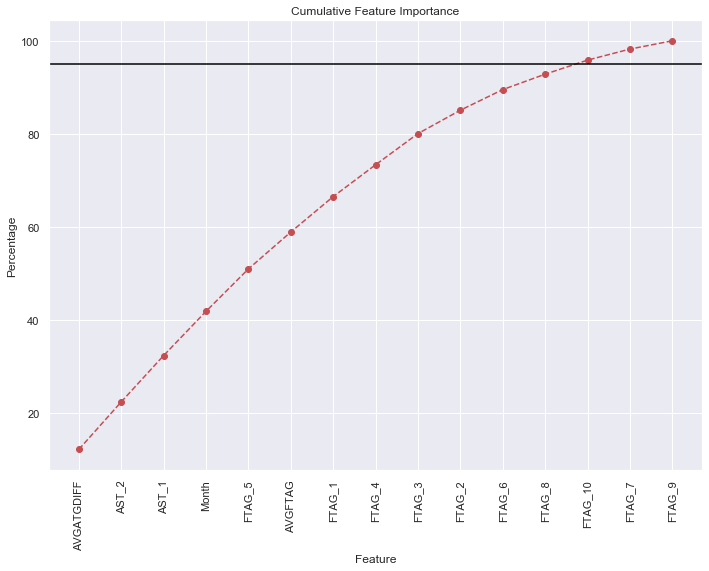

In [41]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
bottom = 0
cum_values=np.cumsum(values)
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [42]:
from sklearn.model_selection import RandomizedSearchCV
rs = random_search(X_train,y_train, cv=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.7s finished


In [43]:
best_params = rs.best_params_

In [ ]:
best_params

In [44]:
# reuses newly calculated params
rfc = random_forrest(
    X_train, y_train, 
    n_estimators=best_params['n_estimators'],
    random_state = 42,
    min_samples_split = best_params['min_samples_split'],
    max_leaf_nodes = best_params['max_leaf_nodes'],
    max_features = best_params['max_features'],
    max_depth = best_params['max_depth'],
    bootstrap = best_params['bootstrap']
)

In [45]:
# recalculates new Mean Absolute Error and accuracy
performance_accuracy(y_test,X_test, rfc)

MAE: 0.8 Goals.
regr Accuracy: 33.64 %.


In [46]:
next_games=df_result
predictions_next_games = rf.predict(next_games)
next_games_predictions=np.round(predictions_next_games,0)

In [47]:
df_all_seasons['FTAG'] = next_games_predictions
df_all_seasons.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTAG,HST,AST,HTGDIFF,ATGDIFF,AVGATGDIFF,AVGFTAG
355,5,12,2017,Everton,Watford,1.0,6,2,1,-1,-1.5,0.7
356,5,12,2017,West Brom,Chelsea,1.0,2,5,-1,1,0.7,1.6
272,3,12,2017,Liverpool,Burnley,1.0,3,1,1,-1,-0.5,1.0
247,2,12,2017,Burnley,Chelsea,1.0,4,2,0,0,0.7,1.6
248,2,12,2017,Swansea,Leicester,0.0,4,1,2,-2,-0.8,0.9


In [48]:
df_all_seasons.to_excel('df_all_seasons_away.xlsx')